In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/Users/sandeep/Documents/RA Work/cleaned_game_dataset/Game Data_MCI Individuals.csv"
mci_data = pd.read_csv(file_path)
file_path = "/Users/sandeep/Documents/RA Work/cleaned_game_dataset/Game Data_Older Adults.csv"
old_data = pd.read_csv(file_path)


/var/folders/sk/txbf71m1079br3st_0g6km780000gn/T/ipykernel_4390/1947111947.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Overall Reaction Time', data=reaction_time_df, palette='viridis')


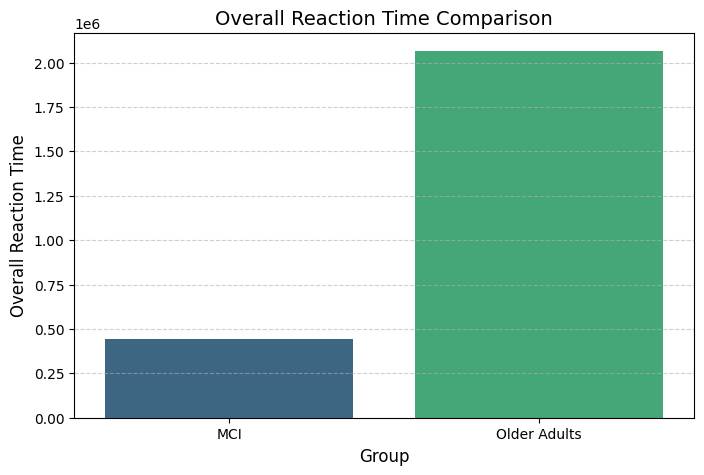

In [6]:
# Calculate overall reaction time (excluding -1 values)
mci_reaction_time = mci_data[mci_data['ReactionTime'] != -1]['ReactionTime'].sum()
older_adults_reaction_time = old_data[old_data['ReactionTime'] != -1]['ReactionTime'].sum()

# Create a DataFrame for visualization
reaction_time_df = pd.DataFrame({
    'Group': ['MCI', 'Older Adults'],
    'Overall Reaction Time': [mci_reaction_time, older_adults_reaction_time]
})

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Overall Reaction Time', data=reaction_time_df, palette='viridis')

# Customize the plot
plt.title('Overall Reaction Time Comparison', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Overall Reaction Time', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

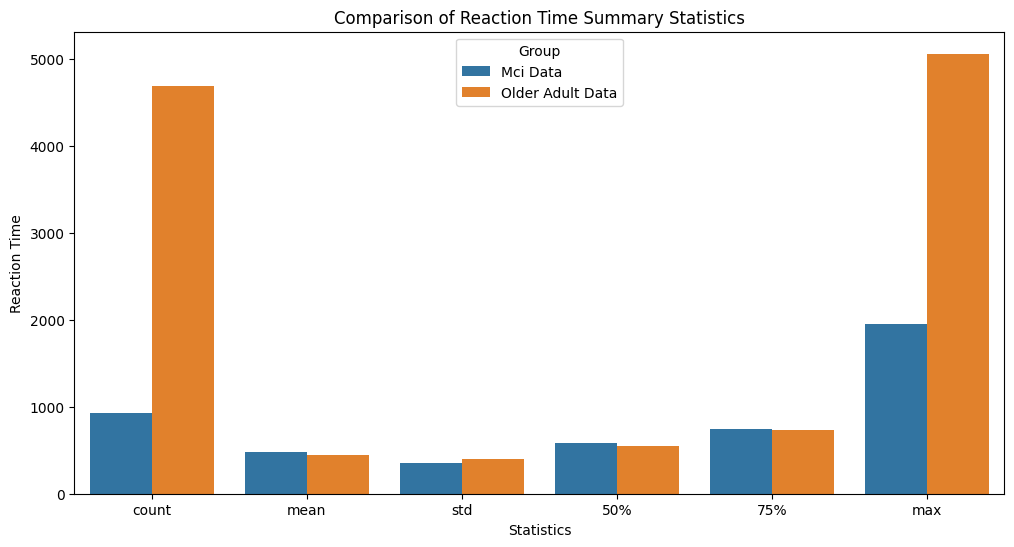

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your main DataFrame and 'older_adult_data' is the DataFrame for older adults
summary_statistics = mci_data.describe()
summary_statistics_reaction = summary_statistics[summary_statistics['ReactionTime'] != -1].reset_index()

older_adult_summary_statistics = old_data.describe()
older_adult_summary_statistics_reaction = older_adult_summary_statistics[older_adult_summary_statistics['ReactionTime'] != -1].reset_index()

# Combine the summary statistics for visualization
summary_statistics_reaction['Group'] = 'Mci Data'
older_adult_summary_statistics_reaction['Group'] = 'Older Adult Data'
combined_summary = pd.concat([summary_statistics_reaction, older_adult_summary_statistics_reaction])

# Visualization using Matplotlib and Seaborn
plt.figure(figsize=(12, 6))

# Bar plot for comparison
sns.barplot(x='index', y='ReactionTime', hue='Group', data=combined_summary)
plt.title('Comparison of Reaction Time Summary Statistics')
plt.xlabel('Statistics')
plt.ylabel('Reaction Time')
plt.legend(title='Group')
plt.show()


,ParticipantNumber,InteractionType,FinalScore,Group
0,912,bad hit,49,MCI Data
1,912,correct hit,2113,MCI Data
2,912,correct rejection,872,MCI Data
3,912,false alarm,28,MCI Data
4,912,miss,196,MCI Data
...,...,...,...,...
128,887,miss,214,Old Data
129,888,correct hit,2624,Old Data
130,888,correct rejection,1518,Old Data
131,888,false alarm,176,Old Data


/var/folders/sk/txbf71m1079br3st_0g6km780000gn/T/ipykernel_4390/2339039843.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='InteractionType', y='FinalScore', hue='Group', data=combined_interaction, ci=None)


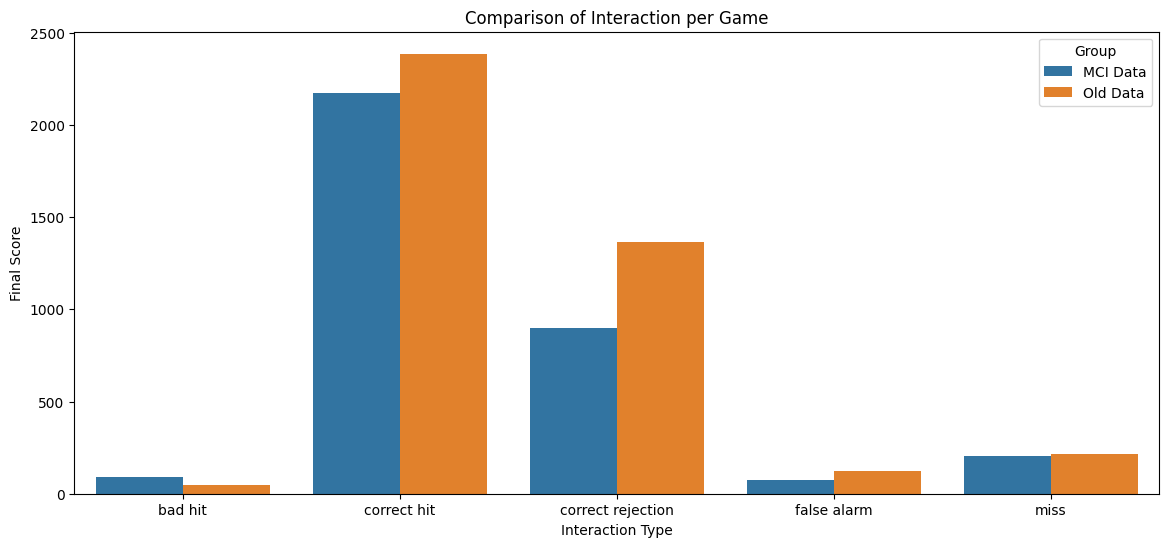

In [14]:
# Calculate interaction per game for mci_data
interaction_per_game_mci = mci_data.groupby(['ParticipantNumber', 'InteractionType'])[['FinalScore']].sum().reset_index()
interaction_per_game_mci['Group'] = 'MCI Data'

# Calculate interaction per game for old_data
interaction_per_game_old = old_data.groupby(['ParticipantNumber', 'InteractionType'])[['FinalScore']].sum().reset_index()
interaction_per_game_old['Group'] = 'Old Data'

# Combine the data for visualization
combined_interaction = pd.concat([interaction_per_game_mci, interaction_per_game_old])

# Display the combined data
display(combined_interaction)

# Visualization using Matplotlib and Seaborn
plt.figure(figsize=(14, 6))

# Bar plot for comparison
sns.barplot(x='InteractionType', y='FinalScore', hue='Group', data=combined_interaction, ci=None)
plt.title('Comparison of Interaction per Game')
plt.xlabel('Interaction Type')
plt.ylabel('Final Score')
plt.legend(title='Group')
plt.show()


,GameName,count,mean,std,min,25%,50%,75%,max,Group
0,TagMeAgainEasy,67.0,643.164179,222.244992,316.0,482.00,597.0,731.50,1330.0,MCI Data
1,TagMeBigger,210.0,821.252381,175.169387,467.0,706.25,809.5,927.75,1952.0,MCI Data
2,TagMeOnly,146.0,648.438356,143.607030,22.0,562.00,648.0,742.75,1188.0,MCI Data
3,TagMeQuick,214.0,613.630841,144.975598,6.0,529.50,609.0,688.25,1129.0,MCI Data
0,TagMeAgainEasy,288.0,698.309028,235.298087,411.0,533.25,626.0,772.25,1451.0,Old Data
1,TagMeAgainMedium,264.0,778.056818,245.944274,381.0,584.00,736.5,920.25,1462.0,Old Data
2,TagMeBigger,900.0,830.676667,273.374307,451.0,688.75,788.5,924.25,5056.0,Old Data
3,TagMeOnly,612.0,681.883987,145.403591,216.0,584.75,651.0,753.25,1349.0,Old Data
4,TagMeQuick,796.0,619.603015,131.612546,4.0,525.00,598.5,688.25,1181.0,Old Data


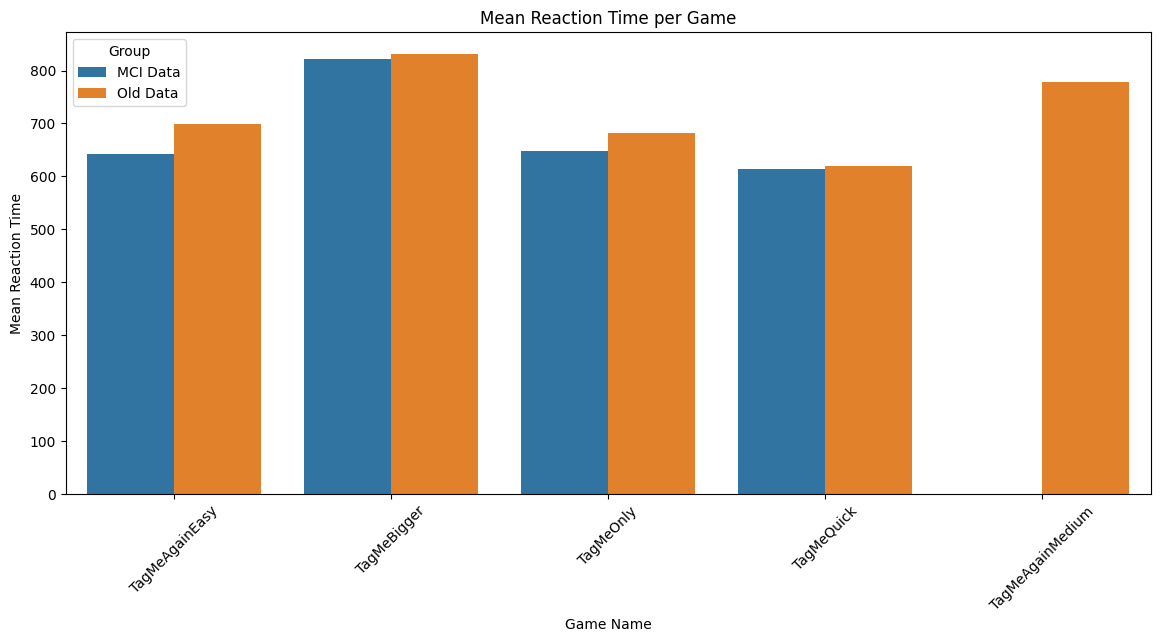

In [20]:
# Calculate game-wise statistics for ReactionTime in mci_data
game_wise_stats_mci = mci_data[mci_data['ReactionTime'] != -1].groupby('GameName')['ReactionTime'].describe().reset_index()
game_wise_stats_mci['Group'] = 'MCI Data'


# Calculate game-wise statistics for ReactionTime in old_data
game_wise_stats_old = old_data[old_data['ReactionTime'] != -1].groupby('GameName')['ReactionTime'].describe().reset_index()
game_wise_stats_old['Group'] = 'Old Data'

# Combine the statistics for visualization
combined_game_wise_stats = pd.concat([game_wise_stats_mci, game_wise_stats_old])

# Display the combined statistics
display(combined_game_wise_stats)

# Visualization using Matplotlib and Seaborn
plt.figure(figsize=(14, 6))

# Bar plot for mean ReactionTime per game
sns.barplot(x='GameName', y='mean', hue='Group', data=combined_game_wise_stats)
plt.title('Mean Reaction Time per Game')
plt.xlabel('Game Name')
plt.ylabel('Mean Reaction Time')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show()



Overall Final Scores:


,Dataset,Overall Final Score
0,MCI Data,23911
1,---,---
2,Old Data,123199


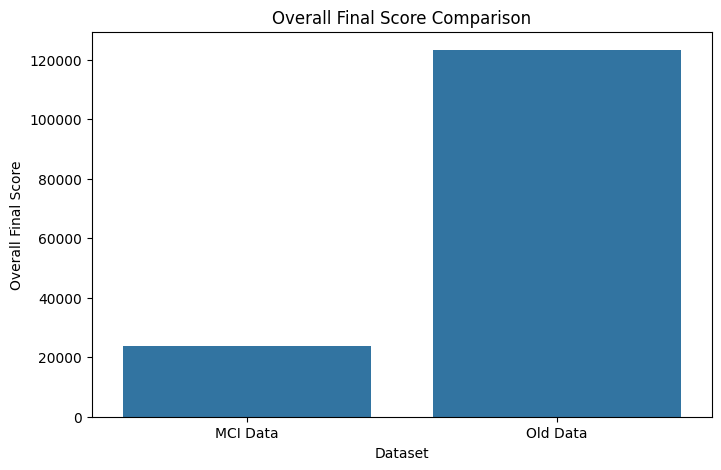

In [25]:
# Creating a DataFrame to store the results
overall_final_scores = pd.DataFrame({
    'Dataset': ['MCI Data', 'Old Data'],
    'Overall Final Score': [overall_final_score_mci, overall_final_score_old]
})



overall_final_scores_with_separator = pd.DataFrame({
    'Dataset': ['MCI Data', '---', 'Old Data'],
    'Overall Final Score': [overall_final_score_mci, '---', overall_final_score_old]
})

print("\nOverall Final Scores:")
display(overall_final_scores_with_separator)

# Visualization: Bar plot for overall final scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Dataset', y='Overall Final Score', data=overall_final_scores)
plt.title('Overall Final Score Comparison')
plt.xlabel('Dataset')
plt.ylabel('Overall Final Score')
plt.show()

Unique Interaction Types per Participant:


,ParticipantNumber,InteractionType,Group
0,912,5,MCI Data
1,914,5,MCI Data
2,917,5,MCI Data
3,918,4,MCI Data
4,919,4,MCI Data
5,920,5,MCI Data
6,922,5,MCI Data
0,792,4,Old Data
1,793,5,Old Data
2,794,4,Old Data



Unique Interaction Types per Participant with Separator:


,ParticipantNumber,InteractionType,Group
0,912,5,MCI Data
1,914,5,MCI Data
2,917,5,MCI Data
3,918,4,MCI Data
4,919,4,MCI Data
5,920,5,MCI Data
6,922,5,MCI Data
0,---,---,---
0,792,4,Old Data
1,793,5,Old Data


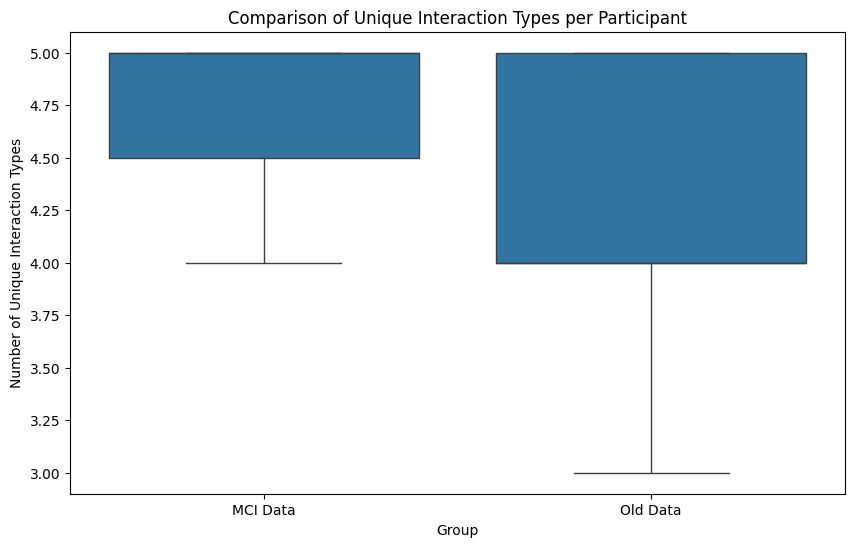

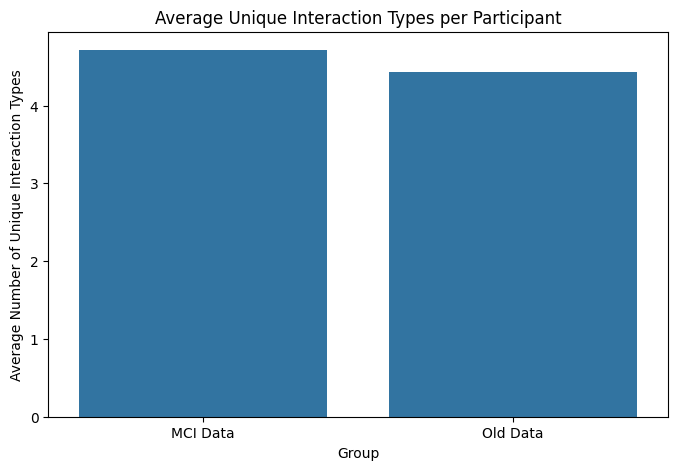

In [26]:
# Calculate unique interaction types per participant for mci_data
overall_interaction_type_mci = mci_data.groupby('ParticipantNumber')['InteractionType'].nunique().reset_index()
overall_interaction_type_mci['Group'] = 'MCI Data'

# Calculate unique interaction types per participant for old_data
overall_interaction_type_old = old_data.groupby('ParticipantNumber')['InteractionType'].nunique().reset_index()
overall_interaction_type_old['Group'] = 'Old Data'

# Combine the results into one DataFrame
combined_interaction_types = pd.concat([overall_interaction_type_mci, overall_interaction_type_old])

# Display the results
print("Unique Interaction Types per Participant:")
display(combined_interaction_types)

# Optional: Add a separator row for better visualization
separator_row = pd.DataFrame({'ParticipantNumber': ['---'], 'InteractionType': ['---'], 'Group': ['---']})
combined_interaction_types_with_separator = pd.concat([overall_interaction_type_mci, separator_row, overall_interaction_type_old])

print("\nUnique Interaction Types per Participant with Separator:")
display(combined_interaction_types_with_separator)

# Visualization: Box plot to compare interaction types between groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='InteractionType', data=combined_interaction_types)
plt.title('Comparison of Unique Interaction Types per Participant')
plt.xlabel('Group')
plt.ylabel('Number of Unique Interaction Types')
plt.show()

# Visualization: Bar plot to show average unique interaction types per group
avg_interaction_types = combined_interaction_types.groupby('Group')['InteractionType'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='InteractionType', data=avg_interaction_types)
plt.title('Average Unique Interaction Types per Participant')
plt.xlabel('Group')
plt.ylabel('Average Number of Unique Interaction Types')
plt.show()